In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [3]:
df_test = pd.read_csv('test.csv')
df_test.index = range(245725, 351037)

df_test

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
245725,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
245726,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
245727,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
245728,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
245729,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes


In [4]:
df_test_sample = pd.read_csv('sample_submission.csv')
df_test_sample.index = range(245725, 351037)

df_test_sample

,ID,Is_Lead
245725,VBENBARO,0
245726,CCMEWNKY,0
245727,VK3KGA9M,0
245728,TT8RPZVC,0
245729,SHQZEYTZ,0
...,...,...
351032,DBENJOYI,0
351033,CWQ72DWS,0
351034,HDESC8GU,0
351035,2PW4SFCA,0


In [5]:
y_train = df_train.iloc[:, -1].values
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
frames = [df_train, df_test]
df = pd.concat(frames)
df

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes,NaN
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No,NaN
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No,NaN
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes,NaN


In [7]:
df.isna().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
dtype: int64

In [8]:
df.Credit_Product.value_counts()

No     205965
Yes    103225
Name: Credit_Product, dtype: int64

In [9]:
#replace nan by frequency

df["Credit_Product"].replace(np.nan, "No", inplace=True)

In [10]:
X = df.iloc[:, 1:-1].values
y_test = df_test_sample.iloc[:, -1].values
y_train = df_train.iloc[:,-1].values

In [11]:
X

array([['Female', 73, 'RG268', ..., 'No', 1045696, 'No'],
       ['Female', 30, 'RG277', ..., 'No', 581988, 'No'],
       ['Female', 56, 'RG268', ..., 'No', 1484315, 'Yes'],
       ...,
       ['Male', 35, 'RG254', ..., 'No', 1703727, 'No'],
       ['Male', 53, 'RG254', ..., 'No', 737178, 'Yes'],
       ['Male', 27, 'RG256', ..., 'No', 591565, 'No']], dtype=object)

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse=False), [0,2,3,4,6,8])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[1.0, 0.0, 0.0, ..., 73, 43, 1045696],
       [1.0, 0.0, 0.0, ..., 30, 32, 581988],
       [1.0, 0.0, 0.0, ..., 56, 26, 1484315],
       ...,
       [0.0, 1.0, 0.0, ..., 35, 15, 1703727],
       [0.0, 1.0, 0.0, ..., 53, 93, 737178],
       [0.0, 1.0, 0.0, ..., 27, 21, 591565]], dtype=object)

In [14]:
X_train = X[0:245725]
X_test = X[245725:]

In [15]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

max_depth = []
accuracy_gini = []
accuracy_entropy = []

for i in range(1,16):
     clf_dec = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=42)
     clf_dec.fit(X_train, y_train)
     y_pred_dec = clf_dec.predict(X_test)
     accuracy_gini.append(accuracy_score(y_test, y_pred_dec))
    
     clf_dec = DecisionTreeClassifier(max_depth=i, criterion='entropy', random_state=42)
     clf_dec.fit(X_train, y_train)
     y_pred_dec = clf_dec.predict(X_test)
     accuracy_entropy.append(accuracy_score(y_test, y_pred_dec))
     
     max_depth.append(i)

    accuracy_gini  accuracy_entropy  max_depth
0        1.000000          1.000000          1
1        0.986317          1.000000          2
2        0.980097          0.962872          3
3        0.975150          0.971637          4
4        0.964002          0.964354          5
5        0.906801          0.966727          6
6        0.902936          0.970212          7
7        0.922421          0.874801          8
8        0.913058          0.894865          9
9        0.903316          0.909251         10
10       0.903126          0.900581         11
11       0.899983          0.898036         12
12       0.890364          0.883423         13
13       0.882473          0.881400         14
14       0.875788          0.881951         15


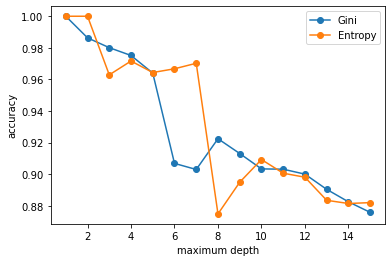

In [16]:
data = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})


plt.plot('max_depth','accuracy_gini', 'o-', data=data, label='Gini')
plt.plot('max_depth','accuracy_entropy', 'o-', data=data, label='Entropy')
plt.xlabel('maximum depth')
plt.ylabel('accuracy')

plt.legend()
print(data)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
#logistic Regression

from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(random_state = 42)
clf_log.fit(X_train, y_train)
y_pred_log = clf_log.predict(X_test)
accuracy_score(y_test, y_pred_log)

0.9572888179884533